# PyOD
Yue Zhao, Zain Nasrullah, and Zheng Li designed and implemented the PyOD library.

it is the most comprehensive and scalable Python library for detecting outlying objects in multivariate data. It provides access to around 20 outlier detection algorithms under a single well-documented API.
This exciting yet challenging field is commonly referred as Outlier Detection or Anomaly Detection.

# 
- https://pyod.readthedocs.io/en/latest/pyod.models.html#module-pyod.models

pyod.models.abod module

pyod.models.anogan module

pyod.models.auto_encoder module

pyod.models.auto_encoder_torch module

pyod.models.cblof module

pyod.models.cof module

pyod.models.combination module

pyod.models.cd module

pyod.models.copod module

pyod.models.deep_svdd module

pyod.models.ecod module

pyod.models.feature_bagging module

pyod.models.gmm module

pyod.models.hbos module

pyod.models.iforest module

pyod.models.inne module

pyod.models.kde module

pyod.models.knn module

pyod.models.lmdd module

pyod.models.loda module

pyod.models.lof module

pyod.models.loci module

pyod.models.lunar module

pyod.models.lscp module

pyod.models.mad module

pyod.models.mcd module

pyod.models.mo_gaal module

pyod.models.ocsvm module

pyod.models.pca module

pyod.models.rgraph module

pyod.models.rod module

pyod.models.sampling module

pyod.models.sod module

pyod.models.so_gaal module

pyod.models.sos module

pyod.models.suod module

pyod.models.vae module

pyod.models.xgbod module

In [13]:
import matplotlib.pyplot as plt

In [15]:
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.font_manager
from pyod.utils.data import generate_data, get_outliers_inliers

In [6]:
import pandas as pd
import numpy as np

# Import models
from pyod.models.abod import ABOD
from pyod.models.cblof import CBLOF
from pyod.models.feature_bagging import FeatureBagging
from pyod.models.hbos import HBOS
from pyod.models.iforest import IForest
from pyod.models.knn import KNN
from pyod.models.lof import LOF
# reading the big mart sales training data
df = pd.read_csv("Train.csv")

In [7]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


<AxesSubplot:xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>

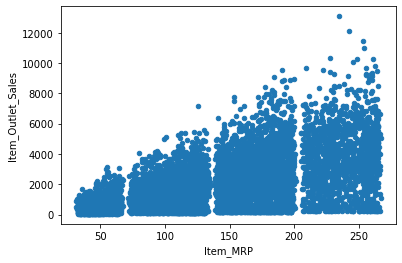

In [8]:
# Let’s plot Item MRP vs Item Outlet Sales to understand the data:

df.plot.scatter('Item_MRP','Item_Outlet_Sales')

- The range of Item Outlet Sales is from 0 to 12000 and Item MRP is from 0 to 250. We will scale down both these features to a range between 0 and 1. 

In [9]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
df[['Item_MRP','Item_Outlet_Sales']] = scaler.fit_transform(df[['Item_MRP','Item_Outlet_Sales']])
df[['Item_MRP','Item_Outlet_Sales']].head()

,Item_MRP,Item_Outlet_Sales
0,0.927507,0.283587
1,0.072068,0.031419
2,0.468288,0.158115
3,0.640093,0.053555
4,0.095805,0.073651


In [10]:
# Store these values in the NumPy array for using in our models later:

X1 = df['Item_MRP'].values.reshape(-1,1)
X2 = df['Item_Outlet_Sales'].values.reshape(-1,1)

X = np.concatenate((X1,X2),axis=1)

## 
creating a dictionary. and adding multiple models to it and see how each model predicts outliers.

to detect 5% observations that are not similar to the rest of the data. So, lets set the value of outlier fraction as 0.05.

outlier fraction can be according to the problem and our understanding of the data

In [11]:
random_state = np.random.RandomState(42)
outliers_fraction = 0.05
# Define seven outlier detection tools to be compared
classifiers = {
        'Angle-based Outlier Detector (ABOD)': ABOD(contamination=outliers_fraction),
        'Cluster-based Local Outlier Factor (CBLOF)':CBLOF(contamination=outliers_fraction,check_estimator=False, random_state=random_state),
        'Feature Bagging':FeatureBagging(LOF(n_neighbors=35),contamination=outliers_fraction,check_estimator=False,random_state=random_state),
        'Histogram-base Outlier Detection (HBOS)': HBOS(contamination=outliers_fraction),
        'Isolation Forest': IForest(contamination=outliers_fraction,random_state=random_state),
        'K Nearest Neighbors (KNN)': KNN(contamination=outliers_fraction),
        'Average KNN': KNN(method='mean',contamination=outliers_fraction)
}

#### Now fit the data to each model one by one and see how differently each model predicts the outliers.

OUTLIERS :  447 , INLIERS :  8076 Angle-based Outlier Detector (ABOD)


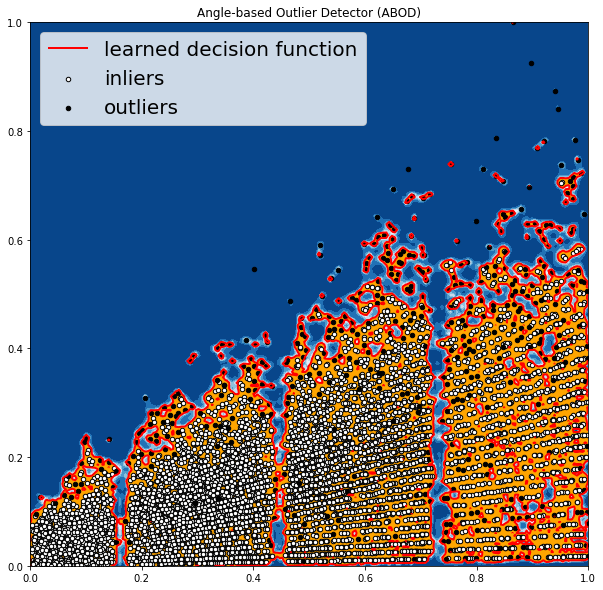

OUTLIERS :  427 , INLIERS :  8096 Cluster-based Local Outlier Factor (CBLOF)


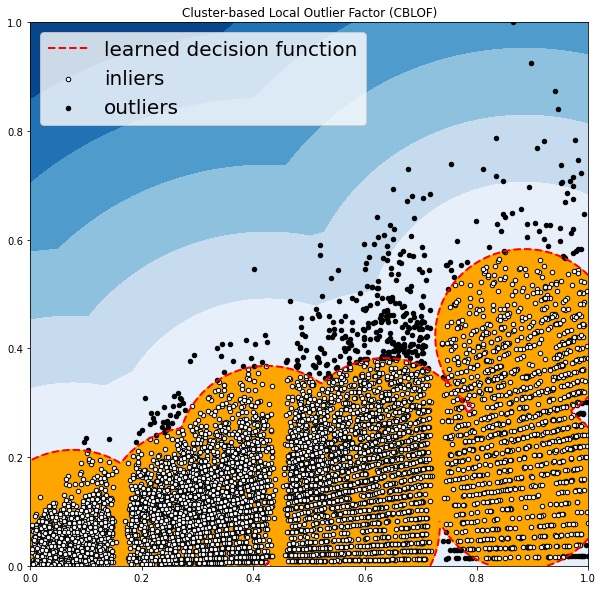

OUTLIERS :  358 , INLIERS :  8165 Feature Bagging


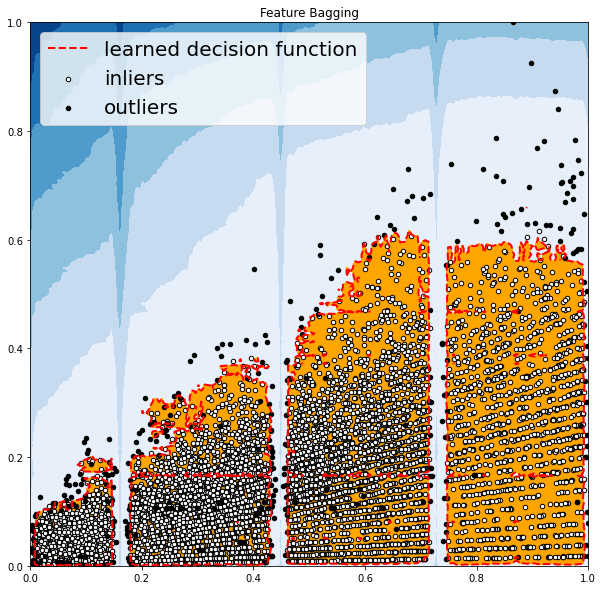

OUTLIERS :  418 , INLIERS :  8105 Histogram-base Outlier Detection (HBOS)


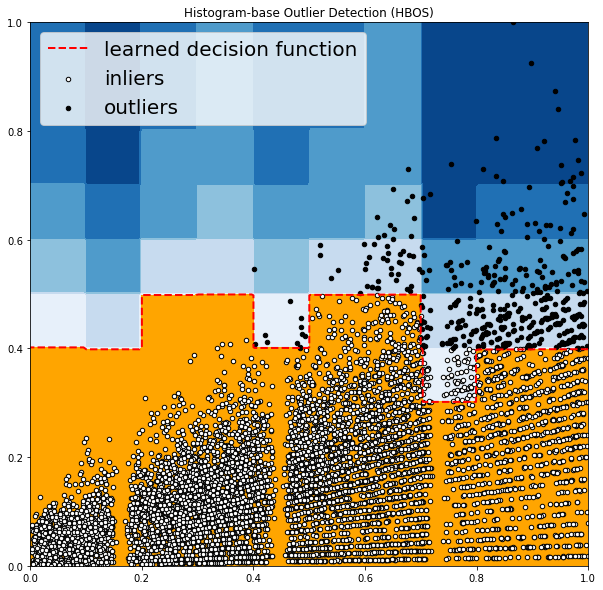

OUTLIERS :  427 , INLIERS :  8096 Isolation Forest


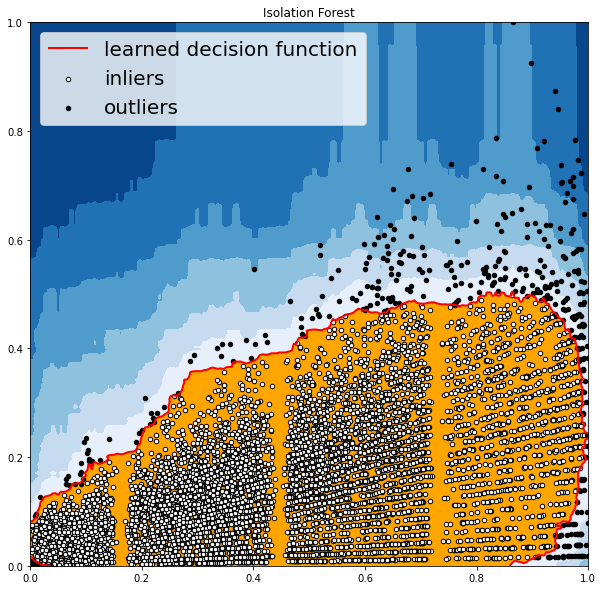

OUTLIERS :  311 , INLIERS :  8212 K Nearest Neighbors (KNN)


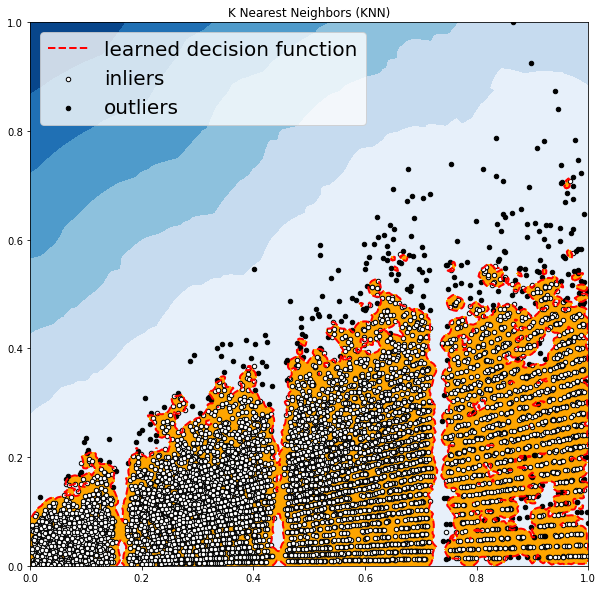

OUTLIERS :  176 , INLIERS :  8347 Average KNN


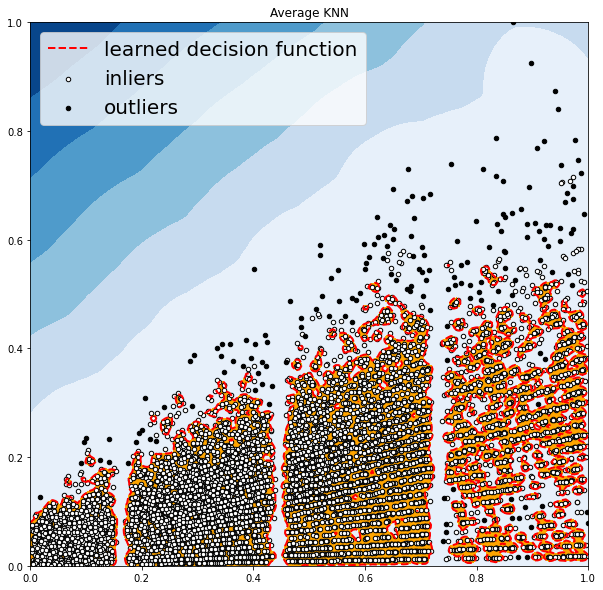

In [19]:
xx , yy = np.meshgrid(np.linspace(0,1 , 200), np.linspace(0, 1, 200))

for i, (clf_name, clf) in enumerate(classifiers.items()):
    clf.fit(X)
    # predict raw anomaly score
    scores_pred = clf.decision_function(X) * -1
        
    # prediction of a datapoint category outlier or inlier
    y_pred = clf.predict(X)
    n_inliers = len(y_pred) - np.count_nonzero(y_pred)
    n_outliers = np.count_nonzero(y_pred == 1)
    plt.figure(figsize=(10, 10))
    
    # copy of dataframe
    dfx = df
    dfx['outlier'] = y_pred.tolist()
    
    # IX1 - inlier feature 1,  IX2 - inlier feature 2
    IX1 =  np.array(dfx['Item_MRP'][dfx['outlier'] == 0]).reshape(-1,1)
    IX2 =  np.array(dfx['Item_Outlet_Sales'][dfx['outlier'] == 0]).reshape(-1,1)
    
    # OX1 - outlier feature 1, OX2 - outlier feature 2
    OX1 =  dfx['Item_MRP'][dfx['outlier'] == 1].values.reshape(-1,1)
    OX2 =  dfx['Item_Outlet_Sales'][dfx['outlier'] == 1].values.reshape(-1,1)
         
    print('OUTLIERS : ', n_outliers,', INLIERS : ', n_inliers, clf_name)
        
    # threshold value to consider a datapoint inlier or outlier
    threshold = stats.scoreatpercentile(scores_pred,100 * outliers_fraction)
        
    # decision function calculates the raw anomaly score for every point
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]) * -1
    Z = Z.reshape(xx.shape)
          
    # fill blue map colormap from minimum anomaly score to threshold value
    plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), threshold, 7),cmap=plt.cm.Blues_r)
        
    # draw red contour line where anomaly score is equal to thresold
    a = plt.contour(xx, yy, Z, levels=[threshold],linewidths=2, colors='red')
        
    # fill orange contour lines where range of anomaly score is from threshold to maximum anomaly score
    plt.contourf(xx, yy, Z, levels=[threshold, Z.max()],colors='orange')
        
    b = plt.scatter(IX1,IX2, c='white',s=20, edgecolor='k')
    
    c = plt.scatter(OX1,OX2, c='black',s=20, edgecolor='k')
       
    plt.axis('tight')  
    
    # loc=2 is used for the top left corner 
    plt.legend(
        [a.collections[0], b,c],
        ['learned decision function', 'inliers','outliers'],
        prop=matplotlib.font_manager.FontProperties(size=20),
        loc=2)
      
    plt.xlim((0, 1))
    plt.ylim((0, 1))
    plt.title(clf_name)
    plt.show()

# 
OUTLIERS :  447 , INLIERS :  8076 | Angle-based Outlier Detector (ABOD)

OUTLIERS :  427 , INLIERS :  8096 | Cluster-based Local Outlier Factor (CBLOF)
        
OUTLIERS :  339 , INLIERS :  8184 | Feature Bagging
        
OUTLIERS :  418 , INLIERS :  8105 | Histogram-base Outlier Detection (HBOS)
        
OUTLIERS :  427 , INLIERS :  8096 | Isolation Forest
        
OUTLIERS :  311 , INLIERS :  8212 | K Nearest Neighbors (KNN)
        
OUTLIERS :  176 , INLIERS :  8347 | Average KNN

#### 
Reference : https://www.analyticsvidhya.com/blog/2019/02/outlier-detection-python-pyod/

Data : https://www.kaggle.com/datasets/devashish0507/big-mart-sales-prediction?select=Train.csv